In [ ]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install umap-learn

In [3]:

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
import tensorflow.keras as keras
import umap

  Using cached umap_learn-0.5.5-py3-none-any.whl
  Using cached numba-0.58.1-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
  Using cached pynndescent-0.5.11-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.41.1-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
  Using cached numpy-1.25.2-cp310-cp310-win_amd64.whl.metadata (5.7 kB)
Using cached numba-0.58.1-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached pynndescent-0.5.11-py3-none-any.whl (55 kB)
Using cached numpy-1.25.2-cp310-cp310-win_amd64.whl (15.6 MB)
Using cached llvmlite-0.41.1-cp310-cp310-win_amd64.whl (28.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1


  You can safely remove it manually.
  You can safely remove it manually.
c:\Users\thepe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
DATA_PATH = 'data/'
DATASET = 'merged_data_clean.csv'

df = pd.read_csv(DATA_PATH + DATASET)


In [74]:
score = df['Pounds of Food Distributed'] / df['TractLOWI']
min_score = np.min([val for val in score if val > 0.0])
imputed_score = np.array([min_score if val == 0.0 else val for val in score])
bank_score = np.log(imputed_score)
cat_bank_score = pd.cut(bank_score, bins=7, labels=False)

In [75]:
numeric_data = df.select_dtypes(include=[float, int])
scaled_data = StandardScaler().fit_transform(numeric_data)

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data, y=bank_score)

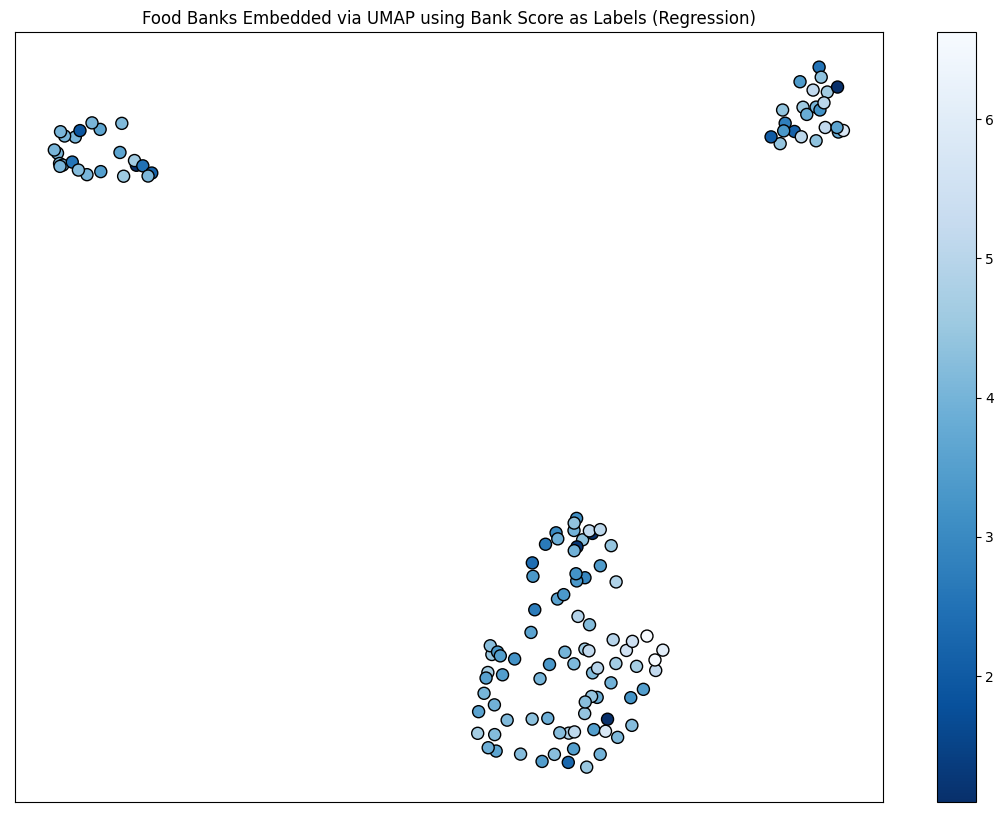

In [76]:
fig, ax = plt.subplots(1, figsize=(14, 10))
scatter = plt.scatter(*embedding.T, s=75, c=bank_score, cmap=plt.cm.get_cmap('Blues_r'), alpha=1.0, edgecolors='black')
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(scatter)
# cbar.set_ticks(np.arange(7))
plt.title('Food Banks Embedded via UMAP using Bank Score as Labels (Regression)');

In [78]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data, y=cat_bank_score)

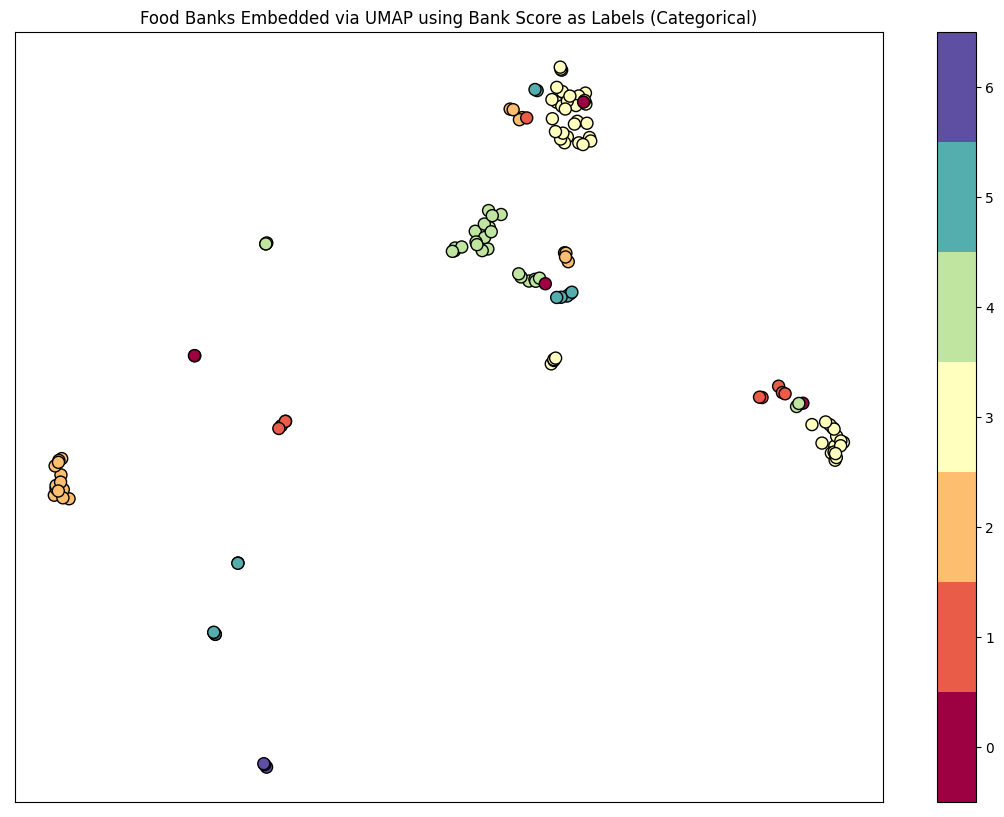

In [79]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=75, c=cat_bank_score, cmap='Spectral', alpha=1.0, edgecolors='black')
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(8)-0.5)
cbar.set_ticks(np.arange(7))
plt.title('Food Banks Embedded via UMAP using Bank Score as Labels (Categorical)');